In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 20,10
import numpy as np
import glob
from scipy import stats

In [2]:
cd CSVs

/Users/racheldilley/Documents/Metis/git_repos/mta-project-1/CSVs


#### Load Data

In [3]:
extension = 'txt'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

#combine all files in the list
data = pd.concat([pd.read_csv(f) for f in all_filenames ])
data


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/11/2019,00:00:00,REGULAR,7053483,2390505
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/11/2019,04:00:00,REGULAR,7053511,2390508
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/11/2019,08:00:00,REGULAR,7053534,2390536
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/11/2019,12:00:00,REGULAR,7053618,2390596
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/11/2019,16:00:00,REGULAR,7053841,2390655
...,...,...,...,...,...,...,...,...,...,...,...
206852,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/03/2019,05:00:00,REGULAR,5554,376
206853,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/03/2019,09:00:00,REGULAR,5554,376
206854,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/03/2019,13:00:00,REGULAR,5554,376
206855,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/03/2019,17:00:00,REGULAR,5554,376


#### Clean Data

remove spaces from column names

In [4]:
data.columns = data.columns.str.replace(' ', '')

add Date_Time column and turnstile column

In [5]:
data['Date_Time'] = pd.to_datetime(data['DATE'], cache=True) + pd.to_timedelta(data['TIME'])

Group by date and stations

In [6]:
grouped_day = data.groupby(['STATION','DATE'], as_index=False).agg({'ENTRIES': ['min', 'max'], 'EXITS': ['min', 'max']})
#grouped = data.groupby(['STATION','DATE']).agg({'ENTRIES': ['min', 'max'], 'EXITS': ['min', 'max']})
#grouped = grouped.set_index('STATION')
#grouped.head()

In [7]:
#grouped.columns = [ 'Station', 'Date', 'ENTRIES_MIN', 'ENTRIES_MAX', 'EXITS_MIN', 'EXITS_MAX']
grouped_day.columns = [ 'Station','Date', 'ENTRIES_MIN', 'ENTRIES_MAX', 'EXITS_MIN', 'EXITS_MAX']
#grouped.columns = ['ENTRIES_MIN', 'ENTRIES_MAX', 'EXITS_MIN', 'EXITS_MAX']
#grouped.dtypes

Add weekday column

In [8]:
grouped_day['Date'] = pd.to_datetime(grouped_day['Date'], cache=True)
grouped_day['Week_Day'] = grouped_day['Date'].dt.day_name()

Find total entries exits, and traffic

In [9]:
grouped_day['Total_Entries'] = grouped_day['ENTRIES_MAX'] - grouped_day['ENTRIES_MIN']
grouped_day['Total_Exits'] = grouped_day['EXITS_MAX'] - grouped_day['EXITS_MIN']
grouped_day['Total_Traffic'] = grouped_day['Total_Exits'] + grouped_day['Total_Exits']
grouped_day.head()

,Station,Date,ENTRIES_MIN,ENTRIES_MAX,EXITS_MIN,EXITS_MAX,Week_Day,Total_Entries,Total_Exits,Total_Traffic
0,1 AV,2019-03-30,100798,955292159,12708,998669812,Saturday,955191361,998657104,1997314208
1,1 AV,2019-03-31,104309,955294001,13062,998670921,Sunday,955189692,998657859,1997315718
2,1 AV,2019-04-01,106948,955296212,13366,998672726,Monday,955189264,998659360,1997318720
3,1 AV,2019-04-02,110569,955297253,13856,998674559,Tuesday,955186684,998660703,1997321406
4,1 AV,2019-04-03,114965,955297587,14325,998676287,Wednesday,955182622,998661962,1997323924


In [10]:
grouped_day.drop(['ENTRIES_MIN','ENTRIES_MAX','EXITS_MIN','EXITS_MAX', 'Total_Entries', 'Total_Exits', ], axis=1)

grouped_day = grouped_day[(np.abs(stats.zscore(grouped_day['Total_Traffic'])) < 3)] #filtering

In [11]:
grouped_time = data.groupby(['STATION','TIME'], as_index=False).agg({'ENTRIES': ['min', 'max'], 'EXITS': ['min', 'max']})
grouped_time.columns = ['Station', 'Time', 'ENTRIES_MIN', 'ENTRIES_MAX', 'EXITS_MIN', 'EXITS_MAX']


In [12]:
grouped_time['Total_Entries'] = grouped_time['ENTRIES_MAX'] - grouped_time['ENTRIES_MIN']
grouped_time['Total_Exits'] = grouped_time['EXITS_MAX'] - grouped_time['EXITS_MIN']
grouped_time['Total_Traffic'] = grouped_time['Total_Exits'] + grouped_time['Total_Exits']
grouped_time.head()

,Station,Time,ENTRIES_MIN,ENTRIES_MAX,EXITS_MIN,EXITS_MAX,Total_Entries,Total_Exits,Total_Traffic
0,1 AV,00:00:00,100798,955451362,12708,998779409,955350564,998766701,1997533402
1,1 AV,04:00:00,101143,955451475,12724,998779435,955350332,998766711,1997533422
2,1 AV,07:41:30,123152,955301590,15360,998678517,955178438,998663157,1997326314
3,1 AV,07:54:19,2442404,370652473,535881,387768467,368210069,387232586,774465172
4,1 AV,07:54:45,2451533,370663467,536971,387783795,368211934,387246824,774493648


In [13]:
grouped_time.drop(['ENTRIES_MIN','ENTRIES_MAX','EXITS_MIN','EXITS_MAX', 'Total_Entries', 'Total_Exits', ], axis=1)

,Station,Time,Total_Traffic
0,1 AV,00:00:00,1997533402
1,1 AV,04:00:00,1997533422
2,1 AV,07:41:30,1997326314
3,1 AV,07:54:19,774465172
4,1 AV,07:54:45,774493648
...,...,...,...
99249,ZEREGA AV,05:00:00,826182
99250,ZEREGA AV,09:00:00,826254
99251,ZEREGA AV,13:00:00,826340
99252,ZEREGA AV,17:00:00,826496


In [14]:
grouped_time = grouped_time[(np.abs(stats.zscore(grouped_time['Total_Traffic'])) < 3)] #filtering

#### Combine data

### Finding top 10 visited stations

In [15]:
Total_ridership = grouped_day.groupby(['Station']).Total_Traffic.sum().reset_index()

In [16]:
Total_ridership.sort_values(by=['Total_Traffic'],inplace = True, ascending = False)


In [17]:
Row_list =[] 
indices = []
  
# Iterate over each row 
for index, rows in Total_ridership[:10].iterrows(): 
    # Create list for the current row 
#    my_list =[rows.STATION, rows.Total_Traffic] 
    my_list =rows.Total_Traffic 
    station_list = rows.Station
    # append the list to the final list 
    Row_list.append(my_list) 
    indices.append(station_list)
Total_ridership.head()


,Station,Total_Traffic
33,182-183 STS,284163869936
65,42 ST-PORT AUTH,281843135406
364,WORLD TRADE CTR,281680223666
172,CHAMBERS ST,277182762888
34,190 ST,276617755672


<BarContainer object of 10 artists>

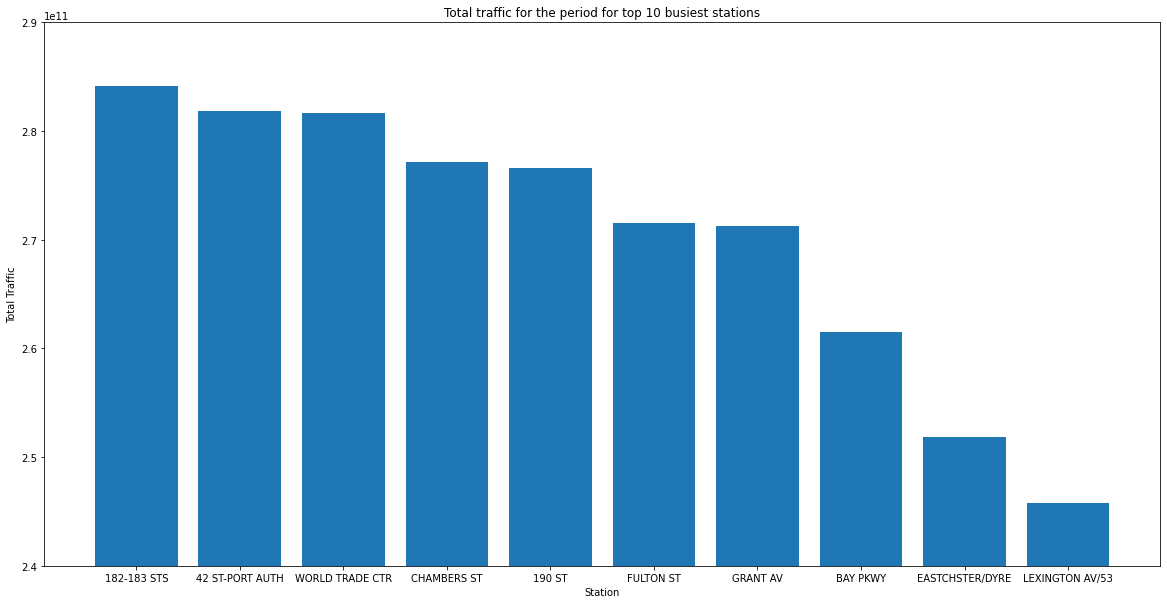

In [18]:
plt.ylim(240000000000,290000000000)
plt.xlabel("Station")
plt.ylabel("Total Traffic")
plt.title("Total traffic for the period for top 10 busiest stations")
plt.bar(indices, Row_list)

In [19]:
indices

['182-183 STS',
 '42 ST-PORT AUTH',
 'WORLD TRADE CTR',
 'CHAMBERS ST',
 '190 ST',
 'FULTON ST',
 'GRANT AV',
 'BAY PKWY',
 'EASTCHSTER/DYRE',
 'LEXINGTON AV/53']

### Find high traffic days

In [20]:
#Total_Weekly_ridership = grouped_day.groupby(['Week_Day']).Total_Traffic.sum().reset_index()
Total_Weekly_ridership = grouped_day.groupby(['Week_Day']).Total_Traffic.mean().reset_index()
Total_Weekly_ridership.sort_values(by=['Total_Traffic'],inplace = True, ascending = False)
Total_Weekly_ridership.head()

,Week_Day,Total_Traffic
0,Friday,4.039308e+08
6,Wednesday,4.030400e+08
4,Thursday,4.027653e+08
5,Tuesday,4.026115e+08
3,Sunday,4.018840e+08


<BarContainer object of 7 artists>

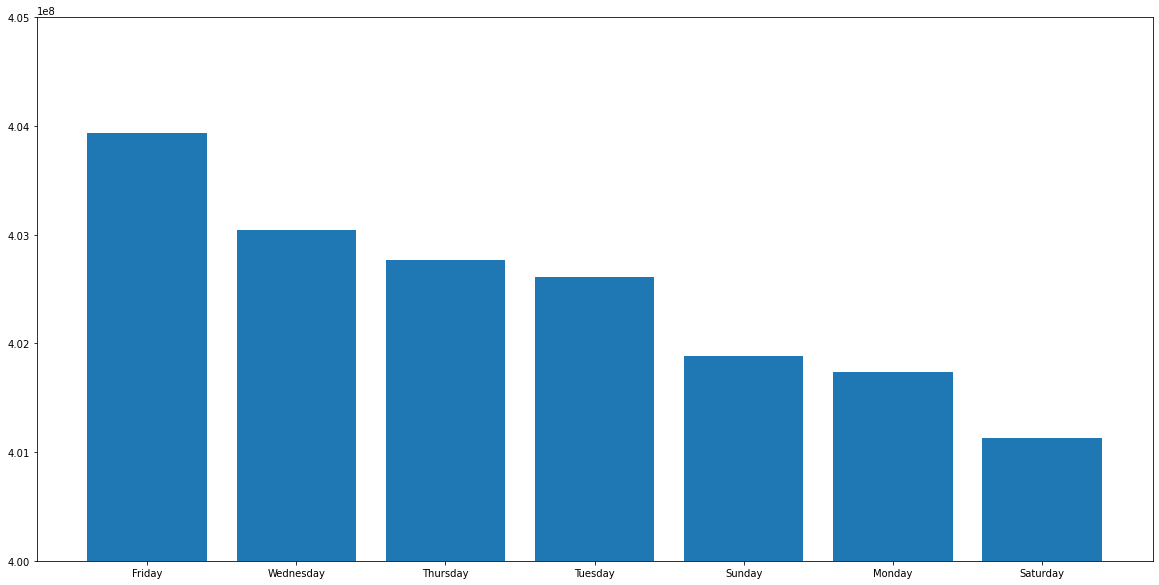

In [21]:
#plt.ylim(1610000000000,1620000000000)
plt.ylim(400000000,405000000)
plt.bar(Total_Weekly_ridership['Week_Day'], Total_Weekly_ridership['Total_Traffic'])

Lowest Trafic Days: Saturday, Monday, Sunday
Highest Traffic Days: Friday, Wedensday, Tuesday 

In [22]:
Top5 = Total_ridership['Station'][0:1].tolist()
#if "CANAL ST" in Top5:
 #   print("TRUE")
#plt.hist(Total_ridership['Total_Traffic'])
#station_grouped_filtered['STATION'].head()
Top5_stations = grouped_day[grouped_day['Station'].isin(Top5)]
#Top5_station_weekly = Top5_stations.groupby(['Station','Week_Day']).Total_Traffic.sum().reset_index()
Top5_station_weekly = Top5_stations.groupby(['Station','Week_Day']).Total_Traffic.mean().reset_index()

       Station   Week_Day  Total_Traffic
0  182-183 STS     Friday   3.690440e+09
1  182-183 STS     Monday   3.690440e+09
2  182-183 STS   Saturday   3.690440e+09
3  182-183 STS     Sunday   3.690440e+09
4  182-183 STS   Thursday   3.690440e+09
5  182-183 STS    Tuesday   3.690440e+09
6  182-183 STS  Wednesday   3.690440e+09


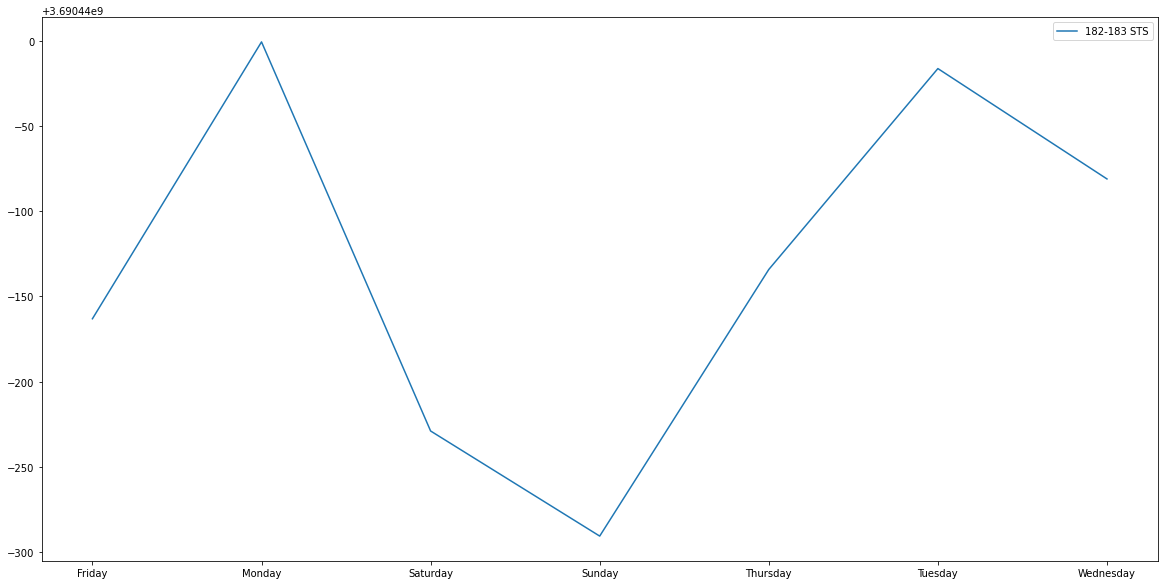

1   NaN
3   NaN
Name: Total_Traffic, dtype: float64


In [23]:

for stations in Top5:
    station = Top5_station_weekly[Top5_station_weekly['Station'] == stations]
    print(station)
    plt.plot(station['Week_Day'],station['Total_Traffic'],label = stations)
#plt.ylim(32500000000,40700000000)
#plt.ylim(400000000,405000000)
plt.legend()
plt.show()

station_monday = station[station['Week_Day'] == 'Monday'] 
station_sunday = station[station['Week_Day'] == 'Sunday']
difference = station_monday['Total_Traffic'] - station_sunday['Total_Traffic']
print(difference)

In [24]:
Bottom5 = Total_ridership['Station'][-10:].tolist()
#if "CANAL ST" in Top5:
 #   print("TRUE")
#plt.hist(Total_ridership['Total_Traffic'])
#station_grouped_filtered['STATION'].head()
Bottom5_stations = grouped_day[grouped_day['Station'].isin(Bottom5)]
Bottom5_stations_weekly = Bottom5_stations.groupby(['Station','Week_Day']).Total_Traffic.sum().reset_index()

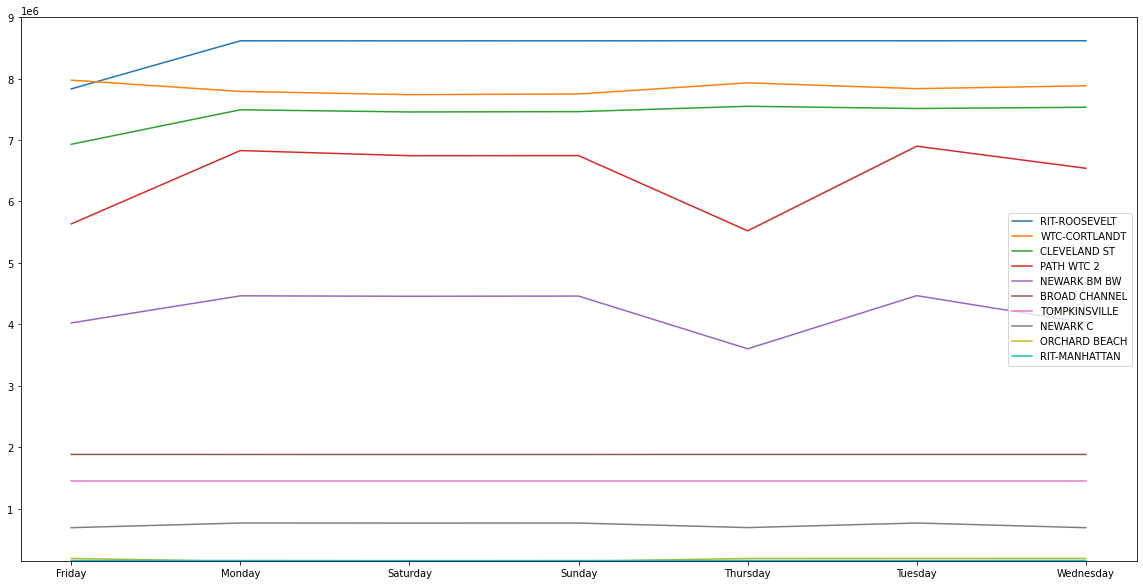

In [25]:
for stations in Bottom5:
    station = Bottom5_stations_weekly[Bottom5_stations_weekly['Station'] == stations]
    #print(station)
    plt.plot(station['Week_Day'],station['Total_Traffic'],label = stations)
plt.ylim(150000,9000000)
plt.legend()
plt.show()

### Find peak hours

### Find high traffic areas for games

### Find top stations in each area code

In [26]:
loc_df = pd.read_csv('http://web.mta.info/developers/data/nyct/subway/Stations.csv')
loc_df

,Station ID,Complex ID,GTFS Stop ID,Division,Line,Stop Name,Borough,Daytime Routes,Structure,GTFS Latitude,GTFS Longitude,North Direction Label,South Direction Label,ADA,ADA Notes
0,1,1,R01,BMT,Astoria,Astoria-Ditmars Blvd,Q,N W,Elevated,40.775036,-73.912034,NaN,Manhattan,0,NaN
1,2,2,R03,BMT,Astoria,Astoria Blvd,Q,N W,Elevated,40.770258,-73.917843,Ditmars Blvd,Manhattan,1,NaN
2,3,3,R04,BMT,Astoria,30 Av,Q,N W,Elevated,40.766779,-73.921479,Astoria - Ditmars Blvd,Manhattan,0,NaN
3,4,4,R05,BMT,Astoria,Broadway,Q,N W,Elevated,40.761820,-73.925508,Astoria - Ditmars Blvd,Manhattan,0,NaN
4,5,5,R06,BMT,Astoria,36 Av,Q,N W,Elevated,40.756804,-73.929575,Astoria - Ditmars Blvd,Manhattan,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,517,517,S15,SIR,Staten Island,Prince's Bay,SI,SIR,Open Cut,40.525507,-74.200064,St George,Tottenville,0,NaN
492,518,518,S14,SIR,Staten Island,Pleasant Plains,SI,SIR,Embankment,40.522410,-74.217847,St George,Tottenville,0,NaN
493,519,519,S13,SIR,Staten Island,Richmond Valley,SI,SIR,Open Cut,40.519631,-74.229141,St George,Tottenville,0,NaN
494,522,522,S09,SIR,Staten Island,Tottenville,SI,SIR,At Grade,40.512764,-74.251961,St George,NaN,1,NaN


In [27]:
burough_dict = { 'Q': 'Queens', 'M': 'Manhattan', 'Bk':'Brooklyn', 'Bx': 'Bronx', 'SI': 'Staten Island'}
loc_df['Borough_Name'] = loc_df['Borough'].map(burough_dict)
loc_df

,Station ID,Complex ID,GTFS Stop ID,Division,Line,Stop Name,Borough,Daytime Routes,Structure,GTFS Latitude,GTFS Longitude,North Direction Label,South Direction Label,ADA,ADA Notes,Borough_Name
0,1,1,R01,BMT,Astoria,Astoria-Ditmars Blvd,Q,N W,Elevated,40.775036,-73.912034,NaN,Manhattan,0,NaN,Queens
1,2,2,R03,BMT,Astoria,Astoria Blvd,Q,N W,Elevated,40.770258,-73.917843,Ditmars Blvd,Manhattan,1,NaN,Queens
2,3,3,R04,BMT,Astoria,30 Av,Q,N W,Elevated,40.766779,-73.921479,Astoria - Ditmars Blvd,Manhattan,0,NaN,Queens
3,4,4,R05,BMT,Astoria,Broadway,Q,N W,Elevated,40.761820,-73.925508,Astoria - Ditmars Blvd,Manhattan,0,NaN,Queens
4,5,5,R06,BMT,Astoria,36 Av,Q,N W,Elevated,40.756804,-73.929575,Astoria - Ditmars Blvd,Manhattan,0,NaN,Queens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,517,517,S15,SIR,Staten Island,Prince's Bay,SI,SIR,Open Cut,40.525507,-74.200064,St George,Tottenville,0,NaN,Staten Island
492,518,518,S14,SIR,Staten Island,Pleasant Plains,SI,SIR,Embankment,40.522410,-74.217847,St George,Tottenville,0,NaN,Staten Island
493,519,519,S13,SIR,Staten Island,Richmond Valley,SI,SIR,Open Cut,40.519631,-74.229141,St George,Tottenville,0,NaN,Staten Island
494,522,522,S09,SIR,Staten Island,Tottenville,SI,SIR,At Grade,40.512764,-74.251961,St George,NaN,1,NaN,Staten Island


In [28]:
loc_df.drop(['Borough','Line','Station ID','Complex ID', 'GTFS Stop ID', 'Line', 'Structure', 
               'Daytime Routes', 'North Direction Label', 'South Direction Label', 'ADA', 'ADA Notes'], axis=1, inplace =True)

In [29]:
loc_df.rename(columns = {'Stop Name':'STATION', 'Division':'DIVISION','GTFS Latitude':'Latitude','GTFS Longitude':'Longitude'}, inplace = True) 
loc_df['STATION'] = loc_df['STATION'].str.upper()

In [30]:
station_loc_df = data.merge(loc_df, how = 'inner', on = ['STATION', 'DIVISION'])
station_loc_df.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Date_Time,Latitude,Longitude,Borough_Name
1777631,J035,R008,00-00-03,111 ST,J,BMT,06/14/2019,04:00:00,REGULAR,6826916,5007656,2019-06-14 04:00:00,40.697418,-73.836345,Queens
1777632,J035,R008,00-00-03,111 ST,J,BMT,06/14/2019,08:00:00,REGULAR,6827070,5007672,2019-06-14 08:00:00,40.697418,-73.836345,Queens
1777633,J035,R008,00-00-03,111 ST,J,BMT,06/14/2019,12:00:00,REGULAR,6827211,5007716,2019-06-14 12:00:00,40.697418,-73.836345,Queens
1777634,J035,R008,00-00-03,111 ST,J,BMT,06/14/2019,16:00:00,REGULAR,6827371,5007789,2019-06-14 16:00:00,40.697418,-73.836345,Queens
1777635,J035,R008,00-00-03,111 ST,J,BMT,06/14/2019,20:00:00,REGULAR,6827501,5007897,2019-06-14 20:00:00,40.697418,-73.836345,Queens


<BarContainer object of 4 artists>

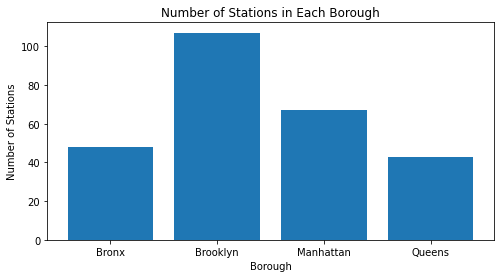

In [31]:
#number of stations in each borough
borough_station_count_df = station_loc_df.groupby('Borough_Name')['STATION'].nunique().reset_index()
borough_station_count_df
plt.rcParams["figure.figsize"] = (8, 4)
plt.xlabel("Borough")
plt.ylabel("Number of Stations")
plt.title("Number of Stations in Each Borough")
plt.bar(borough_station_count_df['Borough_Name'], borough_station_count_df['STATION'])

<BarContainer object of 4 artists>

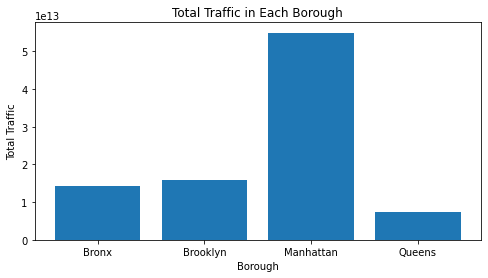

In [32]:
borough_traffic_df = station_loc_df.groupby('Borough_Name').ENTRIES.sum().reset_index()
plt.xlabel("Borough")
plt.ylabel("Total Traffic")
plt.title("Total Traffic in Each Borough")
plt.bar(borough_traffic_df['Borough_Name'], borough_traffic_df['ENTRIES'])
#borough_traffic_df

In [33]:
borough_top5_df = station_loc_df.groupby(['Borough_Name','STATION']).agg({'ENTRIES':'sum'})
borough_top5_df = borough_top5_df['ENTRIES'].groupby('Borough_Name', group_keys=False)
borough_top5_df = borough_top5_df.apply(lambda x: x.sort_values(ascending=False).head(5))
#borough_top5_df

<AxesSubplot:xlabel='Borough_Name'>

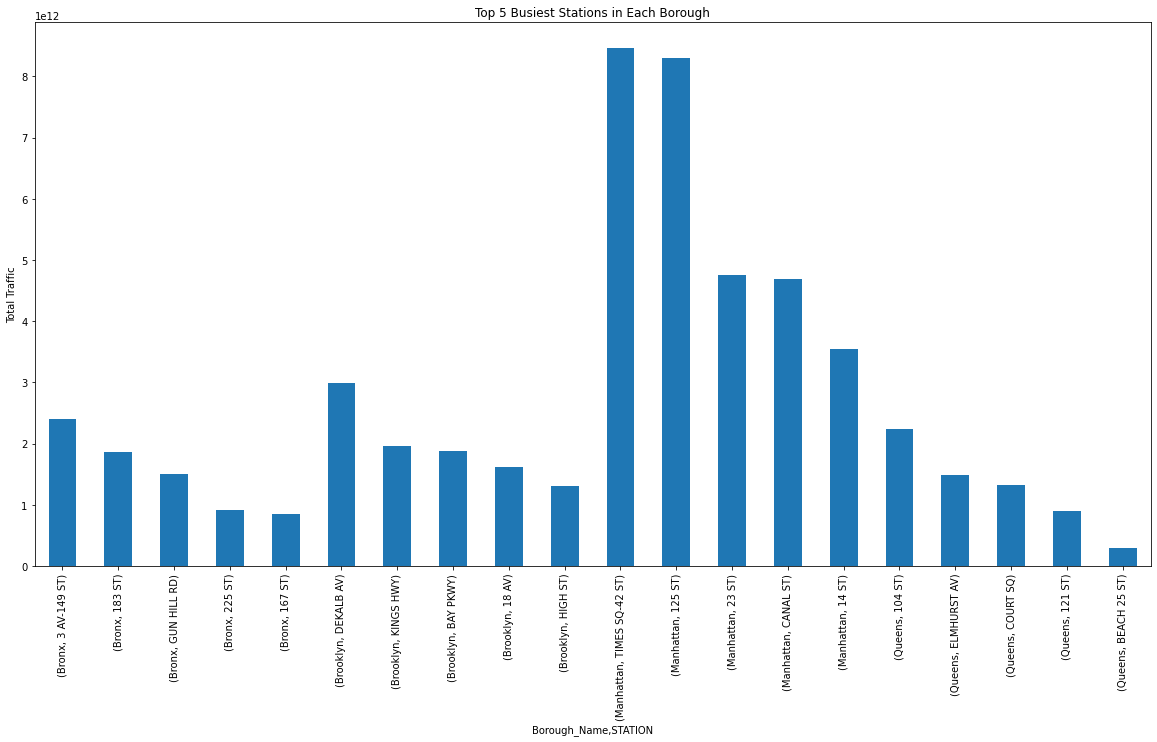

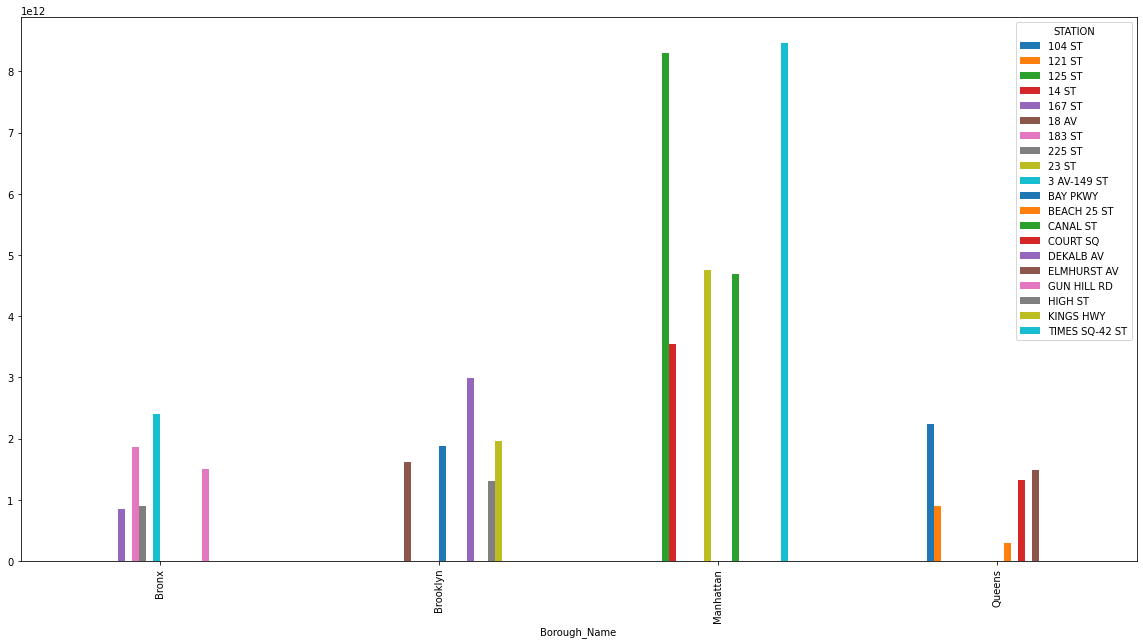

In [34]:
rcParams['figure.figsize'] = 20,10
plt.title("Top 5 Busiest Stations in Each Borough")
plt.ylabel("Total Traffic")
borough_top5_df.plot.bar()
borough_top5_df.unstack().plot.bar()

In [35]:
station_lat_long_df = station_loc_df.groupby(['Latitude','Longitude','STATION'], as_index=False ).ENTRIES.count()
station_lat_long_df.drop(['ENTRIES'], axis=1, inplace =True)
station_lat_long_df.head()

,Latitude,Longitude,STATION
0,40.576312,-73.968501,OCEAN PKWY
1,40.577621,-73.961376,BRIGHTON BEACH
2,40.581011,-73.974574,NEPTUNE AV
3,40.583209,-73.827559,BEACH 105 ST
4,40.585307,-73.820558,BEACH 98 ST


In [36]:
#find max and min of lat and long
BBox = (station_lat_long_df.Longitude.min(),   station_lat_long_df.Longitude.max(),      
         station_lat_long_df.Latitude.min(), station_lat_long_df.Latitude.max())
BBox

(-74.030876, -73.761353, 40.576312, 40.898379)

In [41]:
cd - 

/Users/racheldilley/Documents/Metis/git_repos/mta-project-1


In [43]:
ruh_m = plt.imread('NYC_Map.png') #load NYC Map

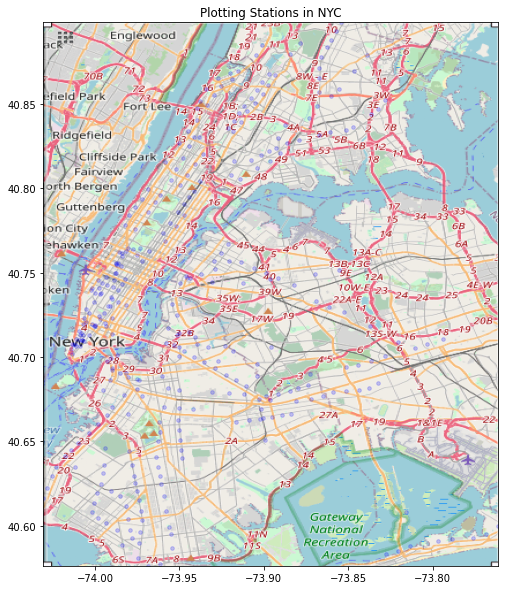

In [44]:
fig, ax = plt.subplots(figsize = (11,10))
ax.scatter(station_lat_long_df.Longitude, station_lat_long_df.Latitude, zorder=1, alpha= 0.2, c='b', s=13)
ax.set_title('Plotting Stations in NYC')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')